# Homework 5

This notebook provides some skeleton code to get you started on the homework. Add in your own code and markdown cells to answer the homework questions. If you want to submit the notebook as a PDF, make sure your code and markdowns are clear and concise to make grading easy for the TAs.

This notebook can be opened in Colab 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlisto/social_media_analytics/blob/main/HW5.ipynb)


Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab. This will save the notebook in your Google Drive.

For all plots, make sure your axes have nice labels with easy to read fontsizes, otherwise points will be deducted.

# Clones, Installs, and Imports


## Clone GitHub Repository
This will clone the repository to your machine. This includes the code and data files. Then change into the directory of the repository.

In [1]:
!git clone https://github.com/zlisto/social_media_analytics

import os
os.chdir("social_media_analytics")

Cloning into 'social_media_analytics'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (256/256), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 256 (delta 141), reused 174 (delta 62), pack-reused 0
Receiving objects: 100% (256/256), 18.31 MiB | 9.21 MiB/s, done.
Resolving deltas: 100% (141/141), done.


## Install Packages


In [2]:
!pip install -r requirements.txt


     |████████████████████████████████| 58 kB 2.4 MB/s 
     |████████████████████████████████| 3.5 MB 8.5 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 1.6 MB 21.1 MB/s 
     |████████████████████████████████| 596 kB 51.6 MB/s 
     |████████████████████████████████| 895 kB 53.3 MB/s 
     |████████████████████████████████| 6.8 MB 37.7 MB/s 
     |████████████████████████████████| 67 kB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 39.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=485b307b236c79eacadc1309a74c9b416978ad33394cb53f865e6253349e82f2
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=0fd24c3e373787aa72dcf59051bb274e50e44da7cc7f322d4a1515bf5e1feb8b
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a

## Import Packages


In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Problem 1. Analyzing a Follower Network with Centralities (52 pts) 

We will be studying the follower network of a set of Twitter users. The nodes in the network are the Twitter users and the edges represent a following relationship. For instance, if @KimKardashian follows @kanyewest, this creates a directed edge pointing from @kanyewest to @KimKardashian.

## 1. (2 points) Load Network

Load the following network in the file `"data/friends_network_realDonaldTrump.pickle"`. This is the follower network of all the people followed by former President Donald Trump, who no longer is on Twitter.  

In [4]:
#1 point for correct file name
#1 point for loaded pickle file in networkx object

fname_following = "data/friends_network_realDonaldTrump.pickle"

G = nx.read_gpickle(fname_following)



## 2. (2 points) Nodes and Edges

How many edges and nodes in the network?

In [5]:
#1 point - correct number of edges printed
#1 point - correct number of nodes printed

nv = G.number_of_nodes()
ne = G.number_of_edges()
print(f"Network has {nv} nodes and {ne} edges")

Network has 46 nodes and 857 edges


## 3. (8 points)  Out-degree Centrality

List the nodes with the five highest out-degree centralities and the corresponding value.




In [6]:
#5 points - calcualated out-degree centrality
#3 points - printed five highest centrality nodes (ok to print dataframe with rows sorted in descending order)

Dout = nx.out_degree_centrality(G)
CC = nx.closeness_centrality(G.reverse())  #reverse edges to match networx convention
BC = nx.betweenness_centrality(G)
EC = nx.eigenvector_centrality(G.reverse())  #reverse edges to match networx convention

#For plotting, we combine all the centrality dictionaries into a dataframe
dictionary_list = []
for screen_name in Dout.keys():
    row = {'screen_name':screen_name,
          'out_degree_centrality':Dout[screen_name],
          'closeness_centrality':CC[screen_name],
          'betweenness_centrality':BC[screen_name],
          'eigenvector_centrality':EC[screen_name]}
    dictionary_list.append(row)
df_centrality = pd.DataFrame(dictionary_list)


In [7]:
df_centrality.sort_values(by = ['out_degree_centrality'],ascending = False).head()

,screen_name,out_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
13,realDonaldTrump,1.000000,1.000000,0.195318,0.270735
3,IvankaTrump,0.888889,0.900000,0.070677,0.248002
1,EricTrump,0.888889,0.900000,0.065791,0.253040
28,seanhannity,0.888889,0.900000,0.038253,0.252258
9,LaraLeaTrump,0.844444,0.865385,0.031291,0.247488


## 4. (8 points) Closeness Centrality
List the nodes with the five highest closeness centralities and the corresponding value  (make sure you reverse the edges in the network).



In [8]:
#4 points - calcualated closeness centrality
# 1 point - reversed edges
#3 points - printed five highest centrality nodes (ok to print dataframe with rows sorted in descending order)

df_centrality.sort_values(by = ['closeness_centrality'],ascending = False).head()


,screen_name,out_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
13,realDonaldTrump,1.000000,1.000000,0.195318,0.270735
3,IvankaTrump,0.888889,0.900000,0.070677,0.248002
1,EricTrump,0.888889,0.900000,0.065791,0.253040
28,seanhannity,0.888889,0.900000,0.038253,0.252258
9,LaraLeaTrump,0.844444,0.865385,0.031291,0.247488


## 5. (8 points) Betweenness Centrality
List the five nodes with the highest betweenness centrality and the corresponding value.  Make sure you make the network undirected.

In [9]:
#4 points - calcualated betweenness centrality
#1 point - made network undirected
#3 points - printed five highest centrality nodes (ok to print dataframe with rows sorted in descending order)

df_centrality.sort_values(by = ['betweenness_centrality'],ascending = False).head()


,screen_name,out_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
13,realDonaldTrump,1.000000,1.000000,0.195318,0.270735
3,IvankaTrump,0.888889,0.900000,0.070677,0.248002
1,EricTrump,0.888889,0.900000,0.065791,0.253040
15,DonaldJTrumpJr,0.800000,0.833333,0.048444,0.226591
28,seanhannity,0.888889,0.900000,0.038253,0.252258


## 6. (8 points) Eigenvector Centrality
List the nodes with the five highest eigenvector centralities and the corresponding value (make sure you reverse the edges in the network).

In [10]:
#4 points - calcualated eigenvector centrality
#1 point - reversed network edges
#3 points - printed five highest centrality nodes (ok to print dataframe with rows sorted in descending order)

df_centrality.sort_values(by = ['eigenvector_centrality'],ascending = False).head()


,screen_name,out_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
13,realDonaldTrump,1.000000,1.000000,0.195318,0.270735
1,EricTrump,0.888889,0.900000,0.065791,0.253040
28,seanhannity,0.888889,0.900000,0.038253,0.252258
3,IvankaTrump,0.888889,0.900000,0.070677,0.248002
9,LaraLeaTrump,0.844444,0.865385,0.031291,0.247488


## 7. (10 points)  Barplots
Make  barplots of each of the four centralities you calculated in the previous parts.  Plot the top five highest values for each centrality.  The barplots should be in a  2 x 2 subplot arrangement.

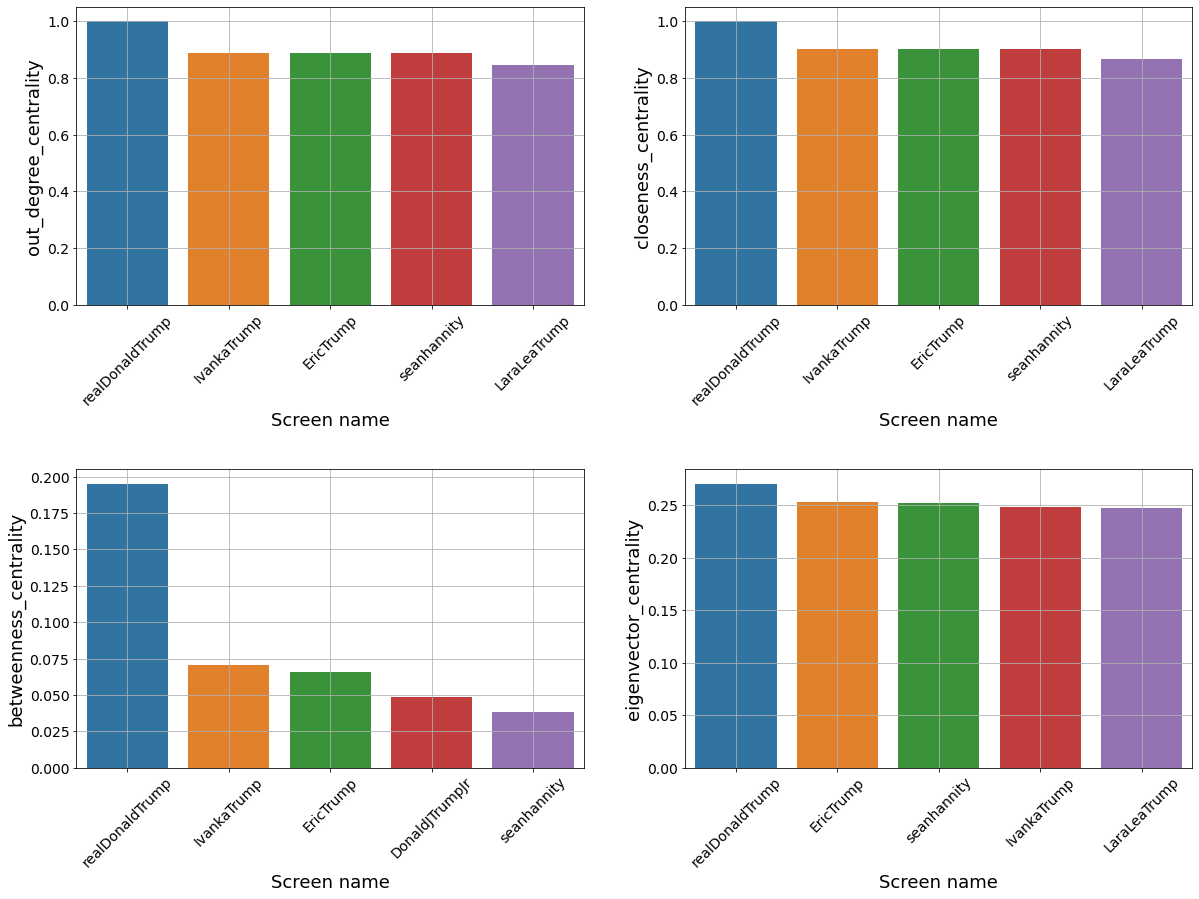

In [11]:
#4 points = plotted each centrality 
#2 points - plotted 5 users per plot
#2 points = sorted in decreasing order for each plot
#1 points = used subplot
#1 point = 2 x 2 subplot grid

Centrality = ['out_degree_centrality','closeness_centrality','betweenness_centrality','eigenvector_centrality']
kmax = 5  #show top kmax users


fig = plt.figure(figsize = (20,14))

for cnt,centrality in enumerate(Centrality):    
    df_plot = df_centrality.sort_values(by=[centrality],ascending=False)  #sort dataframe by centrality value
    plt.subplot(2,2,cnt+1) #make a 2 x 3 subplot, plot in box cnt+1
    
    ax = sns.barplot(data=df_plot[0:kmax], x='screen_name', y=centrality)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylabel(f"{centrality}",fontsize = 18)
    plt.xlabel('Screen name',fontsize = 18)
    plt.grid()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.55)

plt.show()

## 7. (6 points) Qualitative Network Analysis
Write a few sentences explaining who the important people are in the network based on your centrality analysis and why they have such a central position in the network.  Imagine you are explaining this  to someone unfamiliar with the individuals in the network.  You may find it useful to lookup who the individuals in the network are.

**Be lenient here.  Any reasonable analysis that isnt trivial (i.e. realDonaldTrump is the most important because it is his network) gets full credit.**

ex) realDonaldTrump scores highest in each centrality. This because it is his following network, so he is connected to everyone.

ex) The people with high centralities for each centrality measure are IvankaTrump, EricTrump, DonaldTrumpJr, and LaraLeeTrump.  These are realDonaldTrump's children and their spouses.  (Ok if did not mention all family members, but need to identify that family has influence)

ex) seanhannity is also has high centrality values.  He is a Fox News television host who is very close to realDonaldTrump.

# Problem 2. Finding Rumor Sources (50 pts)

We are going to look at the social network of a rumor spreading. The nodes are people that heard the rumor, and the edges represent communication channels (the rumor can only be spread along communication channels).  We do not know who started the rumor, and we do not know which way the rumor spread along the edges.  We are going to use centralities to find the source of the rumor.

## 1. (4 points) Load Network

Load the following network in the file `"data/rumor.pickle"`.  Is the network directed or undirected?  Print your answer.

In [12]:
#1 point for correct file name
#1 point for loaded pickle file in networkx object
#2 points - network is undirected

fname = "data/rumor.pickle"
G = nx.read_gpickle(fname)

print(f"G={G}\nNetwork is undirected")

G=Graph with 17 nodes and 16 edges
Network is undirected


## 2. (8 points) Degree Centrality

Find the degree centrality of each node. Assuming the this centrality tells us how likely someone is to be the source, who are your top three most likely suspects for the rumor source (if there is a tie, break it using your own judgment)?

In [13]:
#5 points - calcualated correct centrality
#3 points - printed three highest centrality nodes (ok to print dataframe with rows sorted in descending order)


D = nx.degree_centrality(G)
CC = nx.closeness_centrality(G)  
BC = nx.betweenness_centrality(G)
EC = nx.eigenvector_centrality(G)

#For plotting, we combine all the centrality dictionaries into a dataframe
dictionary_list = []
for screen_name in D.keys():
    row = {'screen_name':screen_name,
          'degree_centrality':D[screen_name],
          'closeness_centrality':CC[screen_name],
          'betweenness_centrality':BC[screen_name],
          'eigenvector_centrality':EC[screen_name]}
    dictionary_list.append(row)
df_centrality = pd.DataFrame(dictionary_list)


In [14]:
df_centrality.sort_values(by = ['degree_centrality'],ascending = False).head(n=3)

,screen_name,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
7,Tauhid,0.3750,0.347826,0.541667,0.631865
0,Tulips Mom,0.2500,0.390244,0.658333,0.194320
5,Samreen,0.1875,0.390244,0.575000,0.394790


## 3. (8 points) Closeness Centrality
Find the closeness centrality of each node. Assuming this centrality tells us how likely someone is to be the source, who are your top three most likely suspects for the rumor source (if there is a tie, break it using your own judgment).

In [15]:
#5 points - calcualated correct centrality
#3 points - printed three highest centrality nodes (ok to print dataframe with rows sorted in descending order)


df_centrality.sort_values(by = ['closeness_centrality'],ascending = False).head(n=3)


,screen_name,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
4,Samreens Mom,0.1250,0.400000,0.533333,0.229211
0,Tulips Mom,0.2500,0.390244,0.658333,0.194320
5,Samreen,0.1875,0.390244,0.575000,0.394790


## 4. (8 points) Betweenness Centrality
Find the betweenness centrality of each node. Assuming this centrality tells us how likely someone is to be the source, who are your top three most likely suspects for the rumor source (if there is a tie, break it using your own judgment).

In [16]:
#5 points - calcualated correct centrality
#3 points - printed three highest centrality nodes (ok to print dataframe with rows sorted in descending order)


df_centrality.sort_values(by = ['betweenness_centrality'],ascending = False).head(n=3)


,screen_name,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
0,Tulips Mom,0.2500,0.390244,0.658333,0.194320
5,Samreen,0.1875,0.390244,0.575000,0.394790
7,Tauhid,0.3750,0.347826,0.541667,0.631865


## 5. (8 points) Eigenvector Centrality

Find the eigenvector centrality of each node. Assuming this centrality tells us how likely someone is to be the source, who are your top three most likely suspects for the rumor source (if there is a tie, break it using your own judgment)?

In [17]:
#5 points - calcualated correct centrality
#3 points - printed three highest centrality nodes (ok to print dataframe with rows sorted in descending order)


df_centrality.sort_values(by = ['eigenvector_centrality'],ascending = False).head(n=3)


,screen_name,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
7,Tauhid,0.3750,0.347826,0.541667,0.631865
5,Samreen,0.1875,0.390244,0.575000,0.394790
8,Taufiq,0.0625,0.262295,0.000000,0.245844


## 6. (2 points) Find the Source

The actual source is Tulip’s mom. Which centralities predicted this? 



Betweenness did the best at finding the rumor source.

## 7. (2 points) Worst Centrality
Which single centrality did the worst in predicting the true rumor source (i.e. which one did not rank the true source high)? 

Eigenvector centrality did the worst in identifying the true rumor source. 

## 8. (10 pts) Visualize Network
Draw the network, and make the node size proportional to betweenness centrality.  Show the node labels as well so we can tell who is a likely suspect.

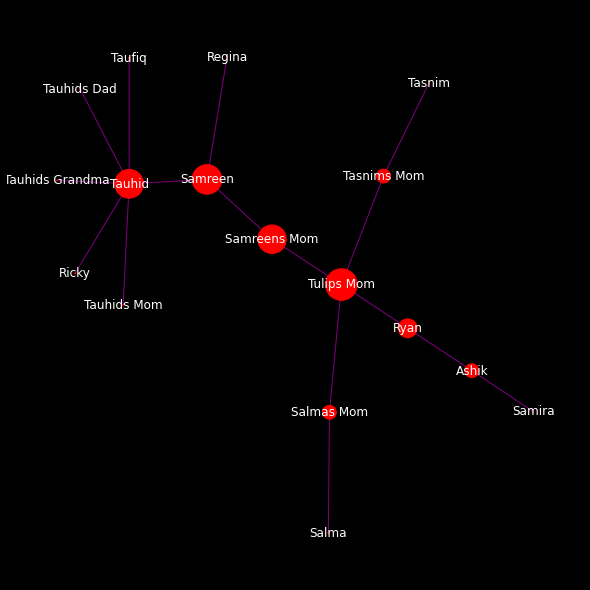

In [18]:
#4 points - draw network
#4 points - size nodes proportional to betweenness centrality
#2 point - show node labels

pos = nx.kamada_kawai_layout(G)  #position of each node in the network


node_color = 'red'
edge_color = 'purple'
background_color = 'black'
edge_width = 1

size_min = 1
size_max = 1000

#define parameters for linear interpolation of node size from out-degree
Centrality = df_centrality.betweenness_centrality.tolist()


dmax = max(Centrality)
dmin = min(Centrality)
slope = (size_max-size_min)/(dmax-dmin)
intercept = size_min-slope*dmin 

#Go through each node and calculate its size
node_size_centrality = [c*slope+intercept  for c in Centrality ]    
    
#Draw the network, with labels    
fig = plt.figure(figsize=(8,8))
nx.draw(G, pos, node_color = node_color, width= edge_width,
        edge_color=edge_color,node_size=node_size_centrality,
       with_labels=True,font_color = 'white')
fig.set_facecolor(background_color)